In [1]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd

In [6]:
raw = pd.read_excel('16pubdb.xls', 'accident 2016')

In [3]:
raw.head()

,Severity,District Council District,Hit and Run,Weather,Rain,Natural Light,Junction Control,Road Classification,Vehicle Movements,Type of Collision,No. of Vehicles Involved,No. of Casualties Injured
0,3,TM,2,1,1,1,3.0,2.0,1,4,1,1
1,3,I,2,1,1,1,4.0,2.0,4,2,2,3
2,2,SSPO,2,1,1,2,4.0,2.0,1,1,1,1
3,3,WCH,2,1,1,1,1.0,2.0,4,2,2,1
4,3,YL,2,1,1,1,6.0,2.0,2,2,2,1


In [4]:
raw.shape

(16099, 12)

In [11]:
pd.DataFrame(raw.groupby('District Council District').count()['Severity'].rename('Numbers')).T

District Council District,CW,E,I,KC,KT,KTS,N,S,SK,SSPO,ST,TM,TP,TW,WCH,WTS,YL,YTM
Numbers,754,733,415,982,1143,902,694,502,641,951,1328,687,1064,886,883,582,1443,1509


In [13]:
raw[['Severity', 'Hit and Run', 'Weather', 'Rain', 'Natural Light', 'Junction Control', 'Road Classification', 'Vehicle Movements', 'Type of Collision', 'No. of Vehicles Involved', 'No. of Casualties Injured']].corr()

,Severity,Hit and Run,Weather,Rain,Natural Light,Junction Control,Road Classification,Vehicle Movements,Type of Collision,No. of Vehicles Involved,No. of Casualties Injured
Severity,1.000000,-0.013796,0.012226,0.018930,-0.012100,-0.038786,0.014115,0.065780,0.051894,0.094821,-0.050859
Hit and Run,-0.013796,1.000000,-0.006178,0.000846,-0.018617,-0.026266,-0.002962,-0.010074,0.031504,-0.004374,0.006234
Weather,0.012226,-0.006178,1.000000,0.465212,0.091589,0.002547,-0.008632,0.019565,0.006363,0.016897,0.009749
Rain,0.018930,0.000846,0.465212,1.000000,0.065228,-0.002995,-0.002502,0.017340,0.002540,0.018665,0.016343
Natural Light,-0.012100,-0.018617,0.091589,0.065228,1.000000,-0.019107,0.004878,0.021428,0.022078,0.008863,0.024010
Junction Control,-0.038786,-0.026266,0.002547,-0.002995,-0.019107,1.000000,-0.011233,-0.014836,0.115830,0.019307,0.041592
Road Classification,0.014115,-0.002962,-0.008632,-0.002502,0.004878,-0.011233,1.000000,0.007000,0.002538,0.012833,0.005764
Vehicle Movements,0.065780,-0.010074,0.019565,0.017340,0.021428,-0.014836,0.007000,1.000000,-0.222890,0.816075,0.230726
Type of Collision,0.051894,0.031504,0.006363,0.002540,0.022078,0.115830,0.002538,-0.222890,1.000000,-0.256006,-0.061390
No. of Vehicles Involved,0.094821,-0.004374,0.016897,0.018665,0.008863,0.019307,0.012833,0.816075,-0.256006,1.000000,0.247829


In [14]:
from mpl_toolkits.basemap import Basemap

In [19]:
m = Basemap(width=12e6, height=9e6, projection='lcc', resolution='c',
           lat_0=22.3963, lat_1=22.3965, lon_0=114.1094, lon_1=114.1096)
m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral', lake_color='aqua')

/usr/local/lib/python3.5/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


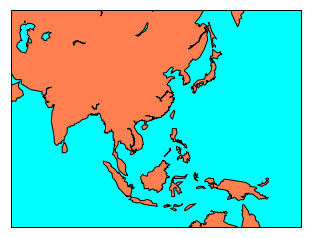

In [20]:
plt.show()

In [21]:
import statsmodels.discrete.discrete_model as sm

In [22]:
y = raw['Severity']

In [23]:
X = raw[['Hit and Run', 'Weather', 'Rain', 'Natural Light', 'Junction Control', 'Road Classification', 'Vehicle Movements', 'Type of Collision', 'No. of Vehicles Involved', 'No. of Casualties Injured']]

In [35]:
model = sm.MNLogit(y, X)

In [36]:
model_fit = model.fit()

Optimization terminated successfully.
         Current function value: 0.448825
         Iterations 9


In [37]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               Severity   No. Observations:                16093
Model:                        MNLogit   Df Residuals:                    16073
Method:                           MLE   Df Model:                           18
Date:                Mon, 15 Jan 2018   Pseudo R-squ.:                 0.03334
Time:                        20:08:00   Log-Likelihood:                -7222.9
converged:                       True   LL-Null:                       -7472.1
                                        LLR p-value:                 2.389e-94
=============================================================================================
               Severity=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Hit and Run                   0.3101      0.583      0.532      0.595      -0.832       1.453
Weather                       0.3147      0.341      0.922      0.357      -0.354       0.984
Rain                         -0.0675      0.192     -0.352      0.725      -0.443       0.308
Natural Light                -0.1362      0.094     -1.447      0.148      -0.321       0.048
Junction Control              0.1116      0.058      1.912      0.056      -0.003       0.226
Road Classification          -0.0324      0.629     -0.052      0.959      -1.266       1.201
Vehicle Movements            -0.1403      0.172     -0.815      0.415      -0.478       0.197
Type of Collision             0.7581      0.117      6.473      0.000       0.529       0.988
No. of Vehicles Involved      0.3565      0.339      1.052      0.293      -0.307       1.020
No. of Casualties Injured     0.0215      0.087      0.248      0.804      -0.148       0.191
---------------------------------------------------------------------------------------------
               Severity=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Hit and Run                  -0.1598      0.563     -0.284      0.777      -1.263       0.944
Weather                       0.3207      0.337      0.951      0.342      -0.340       0.982
Rain                          0.0275      0.187      0.147      0.883      -0.339       0.394
Natural Light                -0.1737      0.092     -1.883      0.060      -0.354       0.007
Junction Control             -0.0141      0.056     -0.249      0.803      -0.125       0.097
Road Classification           1.0734      0.609      1.764      0.078      -0.120       2.266
Vehicle Movements            -0.3145      0.169     -1.863      0.062      -0.645       0.016
Type of Collision             0.9120      0.116      7.858      0.000       0.685       1.139
No. of Vehicles Involved      1.2059      0.333      3.622      0.000       0.553       1.858
No. of Casualties Injured    -0.2017      0.087     -2.318      0.020      -0.372      -0.031
=============================================================================================
"""

In [32]:
raw.isnull().sum()

Severity                     0
District Council District    0
Hit and Run                  0
Weather                      0
Rain                         0
Natural Light                0
Junction Control             1
Road Classification          6
Vehicle Movements            0
Type of Collision            0
No. of Vehicles Involved     0
No. of Casualties Injured    0
dtype: int64

In [33]:
raw_v2 = raw.dropna()

In [34]:
X = raw_v2[['Hit and Run', 'Weather', 'Rain', 'Natural Light', 'Junction Control', 'Road Classification', 'Vehicle Movements', 'Type of Collision', 'No. of Vehicles Involved', 'No. of Casualties Injured']]
y = raw_v2['Severity']